In [84]:
import pandas as pd

df = pd.read_csv("C:/Users/admin/Desktop/Homework/AI/AI_Class/Data/diabetes.csv")

X = df.drop(["Outcome", "BMI"], axis=1).values
Y = df['BMI']

X, Y

(array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]]),
 0      33.6
 1      26.6
 2      23.3
 3      28.1
 4      43.1
        ... 
 763    32.9
 764    36.8
 765    26.2
 766    30.1
 767    30.4
 Name: BMI, Length: 768, dtype: float64)

In [80]:
y = pd.get_dummies(Y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 7), (192, 7), (576, 248), (192, 248))

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(25,input_shape=(7,),activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))

model.compile('rmsprop','mse',metrics=['mse'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 25)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 23)                  │             598 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 21)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,324 (5.17 KB)

 Trainable params: 1,324 (5.17 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
# model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4965 - mse: 0.4965 - val_loss: 1.3642 - val_mse: 1.3642
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 1.3561 - val_mse: 1.3561
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2471 - mse: 1.2471 - val_loss: 0.5827 - val_mse: 0.5827
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7738 - mse: 0.7738 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1392 - mse: 0.1392 - val_loss: 0.3396 - val_mse: 0.3396
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8621 - mse: 0.8621 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3454 - mse: 0.3454 - val_loss: 2.4610 - val_mse: 2.4610
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7134 - mse: 0.7134 - val_loss: 0.4957 - val_mse: 0.4957
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8307 - mse:

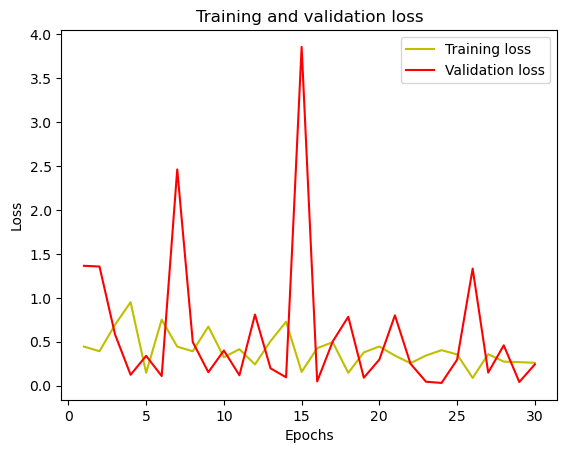

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

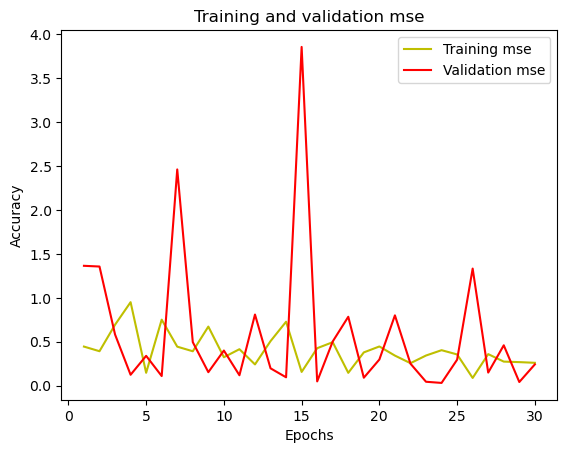

In [102]:
acc =model_history.history['mse']
val_mse =model_history.history['val_mse']
plt.plot(epochs, acc, 'y', label='Training mse')
plt.plot(epochs, val_mse, 'r', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [76]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.01      1.00      0.01         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          33       0.00    

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
